# Analysis of housing data database

In [11]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

import statsmodels.api as sm

1. Loaded the `kc_housing_data.csv` dataset from the `data` folder to a new DataFrame named `df`. The data set contains data relative to *home sales prices and characteristics for Seattle and King County, WA between May 2014 and 2015* ([source](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/)). Looked into the data and familiarised with it.  

In [12]:
df = pd.read_csv('data/kc_housing_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
df['price'].isnull().values.any()

False

In [15]:
df["date"] = pd.to_datetime(df["date"])

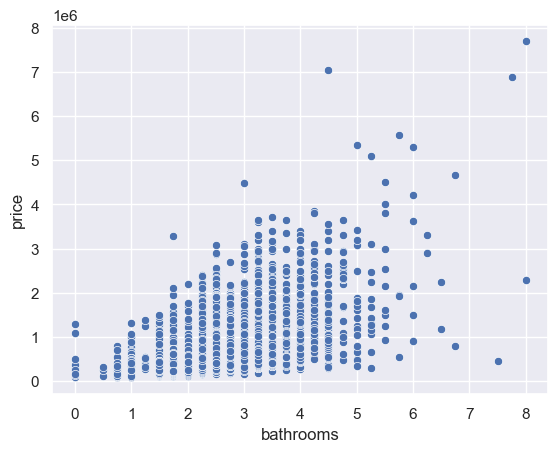

In [16]:
sns.scatterplot(x='bathrooms', y = 'price', data = df)
plt.show()

2. Disigned and fit a multiple linear regression model, using `price` as the dependent variable and the following predictors `['bedrooms', 'bathrooms', 'view', 'grade']`. Produced a summary output. Asked myself the following questions:
    1. Is the resulting model fitting well the data? 
    2. Are all the predictor's coefficients statistically significant? 
    3. Is there multicollinearity between the regressors?

In [17]:
Y = df['price']
X = df[['bedrooms','bathrooms','view', 'grade']]
X = sm.add_constant(data=X)   # add a constant to the model
model_mr = sm.OLS(endog=Y,exog=X)
results_mr = model_mr.fit()

In [18]:
results_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5708.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:30:14   Log-Likelihood:            -2.9981e+05
No. Observations:               21613   AIC:                         5.996e+05
Df Residuals:                   21608   BIC:                         5.997e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.937e+05    1.3e+04    -68.898      0.000   -9.19e+05   -8.68e+05
bedrooms    1.855e+04   2186.988      8.484      0.000    1.43e+04    2.28e+04
bathrooms   5.401e+04   3304.360     16.346      0.000    4.75e+04    6.05e+04
view        1.164e+05   2349.627     49.556      0.000    1.12e+05    1.21e+05
grade       1.606e+05   2014.564     79.722      0.000    1.57e+05    1.65e+05
==============================================================================
Omnibus:                    18992.884   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1893016.549
Skew:                           3.778   Prob(JB):                         0.00
Kurtosis:                      48.222   Cond. No.                         66.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df[['price', 'bedrooms','bathrooms','view', 'grade']].corr()

,price,bedrooms,bathrooms,view,grade
price,1.000000,0.308350,0.525138,0.397293,0.667434
bedrooms,0.308350,1.000000,0.515884,0.079532,0.356967
bathrooms,0.525138,0.515884,1.000000,0.187737,0.664983
view,0.397293,0.079532,0.187737,1.000000,0.251321
grade,0.667434,0.356967,0.664983,0.251321,1.000000


The R squared value is not very high. It's a mediocre model.

The p values for all variables are looking good at 0.0000, so they are all significant coefficients.

There is no multicollinearity because Cond. No. < (1000, 1500)

3. Feature engineering: created a new feature `is_renovated` that is $1$ if the house has been renovated and $0$ otherwise. Added this new feature as a predictor to the previous model.

In [21]:
df['is_renovated'] = 0
df.loc[df['yr_renovated'] != 0, 'is_renovated'] = 1

In [22]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,0
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0


In [23]:
Y = df['price']
X = df[['bedrooms','bathrooms','view', 'grade', 'is_renovated']]
X = sm.add_constant(data=X)   # add a constant to the model
model_mr = sm.OLS(endog=Y,exog=X)
results_mr = model_mr.fit()

In [24]:
results_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     4709.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:30:15   Log-Likelihood:            -2.9964e+05
No. Observations:               21613   AIC:                         5.993e+05
Df Residuals:                   21607   BIC:                         5.993e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.061e+05   1.29e+04    -70.318      0.000   -9.31e+05   -8.81e+05
bedrooms      1.878e+04   2169.733      8.655      0.000    1.45e+04     2.3e+04
bathrooms     5.095e+04   3282.351     15.524      0.000    4.45e+04    5.74e+04
view           1.12e+05   2343.360     47.783      0.000    1.07e+05    1.17e+05
grade         1.622e+05   2000.519     81.089      0.000    1.58e+05    1.66e+05
is_renovated   1.61e+05   8644.471     18.621      0.000    1.44e+05    1.78e+05
==============================================================================
Omnibus:                    18917.249   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1839698.818
Skew:                           3.761   Prob(JB):                         0.00
Kurtosis:                      47.568   Cond. No.                         66.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared is slightly better.

In [26]:
df[['price', 'bedrooms','bathrooms','view', 'grade', 'is_renovated']].corr()

,price,bedrooms,bathrooms,view,grade,is_renovated
price,1.000000,0.308350,0.525138,0.397293,0.667434,0.126092
bedrooms,0.308350,1.000000,0.515884,0.079532,0.356967,0.018553
bathrooms,0.525138,0.515884,1.000000,0.187737,0.664983,0.050260
view,0.397293,0.079532,0.187737,1.000000,0.251321,0.104062
grade,0.667434,0.356967,0.664983,0.251321,1.000000,0.014008
is_renovated,0.126092,0.018553,0.050260,0.104062,0.014008,1.000000


4. Test: if I owned a house in King County, WA that has 4 bedrooms, 2 bathrooms and no particuar view, with a construction grade of 8 and that has been recently renovated. How much could I sell it for according to my last model?

In [28]:
type(results_mr)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [29]:
pred = results_mr.predict(np.array([1, 4, 2, 0, 8, 1]))
pred

array([729642.00573693])

5. Using the previous model as the starting point, added the `sqft_lot` variable as a new predictor, estimated the new model and produced the usual summary output.

In [30]:
Y = df['price']
X = df[['bedrooms','bathrooms','view', 'grade', 'is_renovated', 'sqft_lot']]
X = sm.add_constant(data=X)   # add a constant to the model
model_mr = sm.OLS(endog=Y,exog=X)
results_mr = model_mr.fit()

In [31]:
results_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     3924.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:30:15   Log-Likelihood:            -2.9964e+05
No. Observations:               21613   AIC:                         5.993e+05
Df Residuals:                   21606   BIC:                         5.993e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -9.06e+05   1.29e+04    -70.268      0.000   -9.31e+05   -8.81e+05
bedrooms      1.879e+04   2170.069      8.659      0.000    1.45e+04     2.3e+04
bathrooms     5.093e+04   3283.096     15.513      0.000    4.45e+04    5.74e+04
view          1.119e+05   2345.984     47.713      0.000    1.07e+05    1.17e+05
grade         1.622e+05   2004.862     80.891      0.000    1.58e+05    1.66e+05
is_renovated   1.61e+05   8644.648     18.620      0.000    1.44e+05    1.78e+05
sqft_lot         0.0145      0.042      0.346      0.729      -0.068       0.097
==============================================================================
Omnibus:                    18919.522   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1840400.254
Skew:                           3.762   Prob(JB):                         0.00
Kurtosis:                      47.576   Cond. No.                     3.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model's fit has worsened, and then Condition Number indicates strong multicollinearity.

I think I'm using way too many parameters dependant on one another for my prediction.

Furthermore, the P value is too high. Either sqft_lot is explained by some of the variables I'm already using or sqft explains some of the variables I'm already using in the model

In [33]:
df.corr()

C:\Users\flbon\AppData\Local\Temp\ipykernel_25404\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.016943
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.126092
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.018553
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.050260
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.055094
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.007745
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.006260
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.093294
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.104062
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.060139


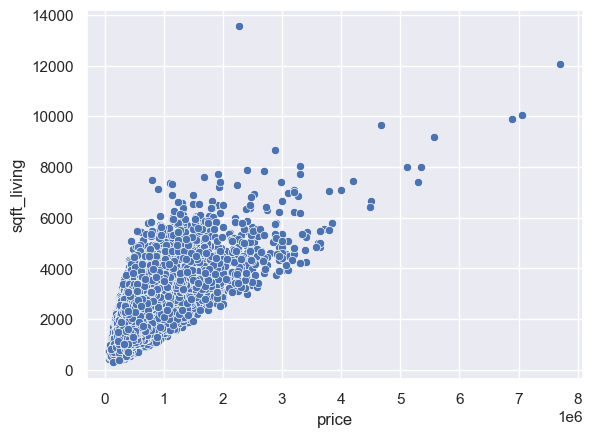

In [34]:
sns.scatterplot(x='price', y='sqft_living', data=df)
plt.show()

6. Using the model defined in question 3, split the dataset into two training and test subsets, where 33% of the available data should be used for testing (use `random_state=42` to make the results replicable). Then: 
    1. Fit the model to the training split
    2. Calculated the MAE for the training model
    3. Used the testing data to predict the response variable `y_test` using the model you just fitted 
    4. Calculated the MAE for the test model

In [35]:
y = df['price']
X = df[['bedrooms', 'bathrooms', 'view', 'grade', 'is_renovated']]
X = sm.add_constant(data = X)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
model = sm.OLS(y_train,X_train)
results = model.fit()

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     3199.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:30:29   Log-Likelihood:            -2.0029e+05
No. Observations:               14480   AIC:                         4.006e+05
Df Residuals:                   14474   BIC:                         4.006e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.793e+05   1.53e+04    -57.632      0.000   -9.09e+05   -8.49e+05
bedrooms      1.852e+04   2547.634      7.269      0.000    1.35e+04    2.35e+04
bathrooms     5.305e+04   3905.973     13.583      0.000    4.54e+04    6.07e+04
view          1.088e+05   2796.095     38.909      0.000    1.03e+05    1.14e+05
grade         1.582e+05   2371.964     66.690      0.000    1.54e+05    1.63e+05
is_renovated  1.656e+05   1.03e+04     16.004      0.000    1.45e+05    1.86e+05
==============================================================================
Omnibus:                    12150.334   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1069332.790
Skew:                           3.529   Prob(JB):                         0.00
Kurtosis:                      44.504   Cond. No.                         66.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [40]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(y_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train)) # mae

Naïve Training MAE: 230714.87
Training MAE: 162253.46


In [41]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 240532.88
Testing MAE: 168075.5


I would say it's overfitting the data and would use less independent variables and be more careful of multicollinearity!

7. Defined two new functions `mape()` and `rmse()` that calculate the Mean Absolute Percentage Error and the Root Mean Squared Error respectively. Used them on the training and testing predictions from point 6. 

In [42]:
def mape(y, pred): 
    return round(np.mean(np.abs((y-pred)/y))*100,2)

def rmse(y, pred): 
    return round(np.sqrt(np.mean((y-pred)**2)),2)

In [43]:
print('Training MAPE:', mape(y_train, pred_train)) 
print('Testing MAPE:', mape(y_test, pred_test))

Training MAPE: 34.7
Testing MAPE: 34.95


In [44]:
print('Training RMSE:', rmse(y_train, pred_train)) 
print('Testing RMSE:', rmse(y_test, pred_test))

Training RMSE: 246005.52
Testing RMSE: 269549.52


8. Using the [relative formula](https://medium.com/analytics-vidhya/adjusted-r-squared-formula-explanation-1ce033e25699), calculated the Adjusted R-squared for the **test predictions** from point 6. 

In [45]:
ssr_test = np.sum((y_test - pred_test)**2)
sst_test = np.sum((y_test - np.mean(y_test))**2)
rsq_test = 1 - (ssr_test/sst_test)

In [50]:
rsq_adj_test = 1 - ((1-rsq_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [51]:
rsq_adj_test

0.5143427818079187

To improve the model further, maintaining all coefficients statistically significant and keeping multicollinearity at bay, I would try adding everything that has high corr with price: sftq_living, grade, sqft_above, sqft_living15, bathrooms.

In [70]:
df.corr()

C:\Users\flbon\AppData\Local\Temp\ipykernel_22852\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is renovated,is_renovated
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.016943,-0.016943
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.126092,0.126092
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.018553,0.018553
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.050260,0.050260
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.055094,0.055094
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.007745,0.007745
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.006260,0.006260
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.093294,0.093294
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.104062,0.104062
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.060139,-0.060139


In [54]:
df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']].corr()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms
sqft_living,1.000000,0.762704,0.876597,0.756420,0.754665
grade,0.762704,1.000000,0.755923,0.713202,0.664983
sqft_above,0.876597,0.755923,1.000000,0.731870,0.685342
sqft_living15,0.756420,0.713202,0.731870,1.000000,0.568634
bathrooms,0.754665,0.664983,0.685342,0.568634,1.000000


In [55]:
# removing the most correlated

df[['sqft_living', 'grade','bathrooms']].corr()

,sqft_living,grade,bathrooms
sqft_living,1.000000,0.762704,0.754665
grade,0.762704,1.000000,0.664983
bathrooms,0.754665,0.664983,1.000000


In [57]:
y = df['price']
X = df[['sqft_living', 'grade','bathrooms', 'is_renovated']]
X = sm.add_constant(data = X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = sm.OLS(y_train,X_train)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     4426.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:44:47   Log-Likelihood:            -1.9989e+05
No. Observations:               14480   AIC:                         3.998e+05
Df Residuals:                   14475   BIC:                         3.998e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.921e+05   1.56e+04    -38.072      0.000   -6.23e+05   -5.62e+05
sqft_living    194.7832      3.936     49.483      0.000     187.067     202.499
grade         1.035e+05   2686.504     38.520      0.000    9.82e+04    1.09e+05
bathrooms    -3.501e+04   4044.952     -8.656      0.000   -4.29e+04   -2.71e+04
is_renovated  1.828e+05      1e+04     18.235      0.000    1.63e+05    2.02e+05
==============================================================================
Omnibus:                    11043.693   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           643296.102
Skew:                           3.151   Prob(JB):                         0.00
Kurtosis:                      35.039   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""